# Project Customer Churn
## Sumitted By : Vijay B G - vijay.sudhaganesh@gmail.com

In [1]:
#Importing needed Libeary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the the Dataset

data = pd.read_csv("./customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# To see total dataset

# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# data

In [4]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#To see the Min,Max,Iqr

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 1.Data Manipulation

In [6]:
# a.Extract the 5th column and store it in ‘customer_5’

customer_5 = data.iloc[ : ,4:5]
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [7]:
# b.Excate the 15th column and store it in ‘customer_15’

customer_15 = data.iloc[ : , 14:15]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


In [8]:
# c.Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

senior_male_electronic = data[ (data["gender"] == "Male") & (data["SeniorCitizen"] == 1) & (data["PaymentMethod"] == "Electronic check") ]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [9]:
# d. Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

customer_total_tenure = data [(data['tenure'] > 70) | (data['MonthlyCharges'] > 100.00)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [10]:
# e.Extract all the customers whose contract is of two years, payment methodis mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

two_mail_yes = data[(data["Contract"] == 'Two year') & (data['PaymentMethod'] == 'Mailed check' ) & (data['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [11]:
# f.Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’

customer_333 = data.sample(n =333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6676,5274-XHAKY,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),94.30,3893.6,No
5627,9334-GWGOW,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,485.25,No
2849,6838-HVLXG,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,246.7,No
6331,1929-ZCBHE,Male,0,Yes,Yes,47,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,40.30,1794.8,No
4476,7434-SHXLS,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,3407-JMJQQ,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.00,7661.8,No
6975,1904-WAJAA,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Two year,No,Electronic check,64.35,1558.65,No
4932,5566-SOEZD,Male,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,...,No,No,No,No,One year,Yes,Credit card (automatic),80.65,2209.75,No
5631,6542-LWGXJ,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No


In [12]:
# g.Get the count of different levels from the ‘Churn’ column

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## 2. Data Visualization:
### 1. Build a bar-plot for the ’InternetService’ column:

In [13]:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be 'Distibution of internet service' 
#d. Set the color of the bars to be ‘orange’

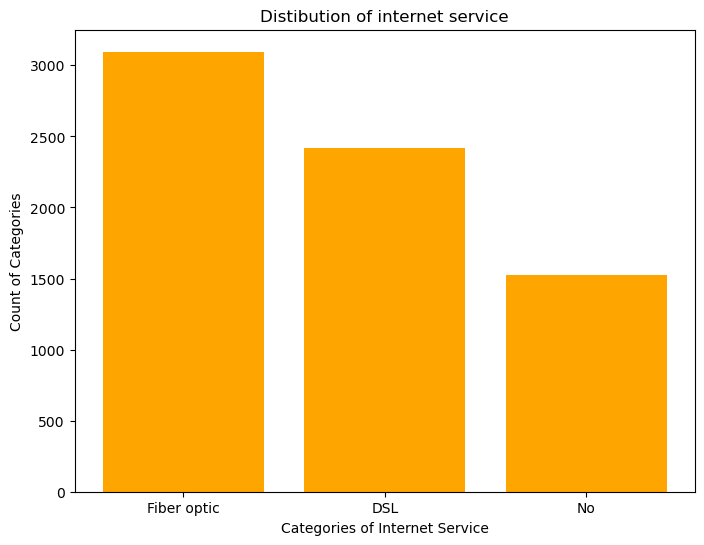

In [14]:
plt.figure(figsize = (8,6))

x = data['InternetService'].value_counts()

plt.bar(x.index, x.values, color = 'orange')

plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distibution of internet service')

plt.show()

### 2.Build a histogram for the ‘tenure’ column:

In [15]:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title 'Distribution of tenure'

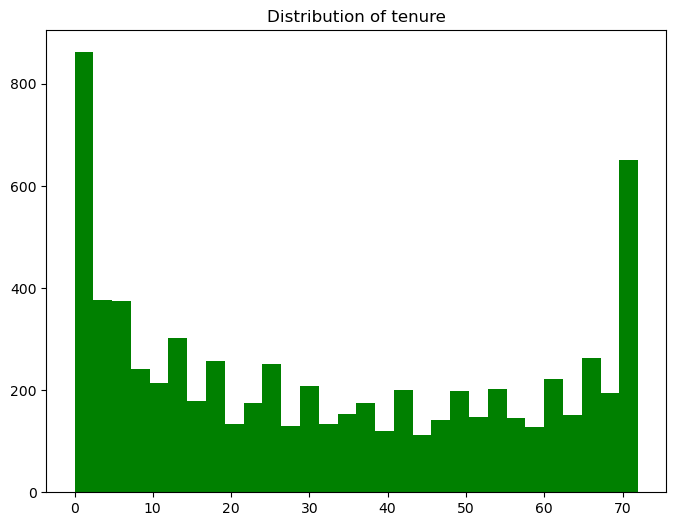

In [16]:
plt.figure(figsize = (8,6))

plt.hist(data['tenure'], bins= 30, color = 'green')

plt.title('Distribution of tenure')

plt.show()

### 3.Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’.  

In [17]:
# Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’

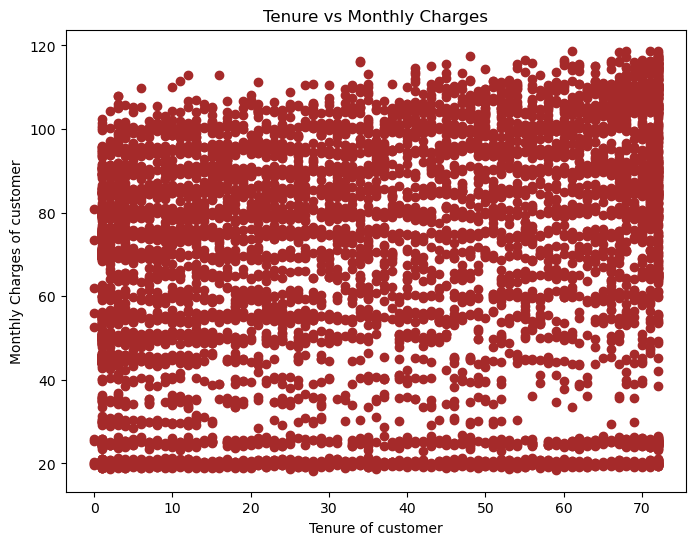

In [18]:
plt.figure(figsize = (8,6))

plt.scatter(x = data['tenure'], y = data['MonthlyCharges'], color = 'brown')

plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

plt.show()

### 4. Build a box-plot between ‘tenure’ & ‘Contract’.

In [19]:
 # a.Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

<Axes: xlabel='Contract', ylabel='tenure'>

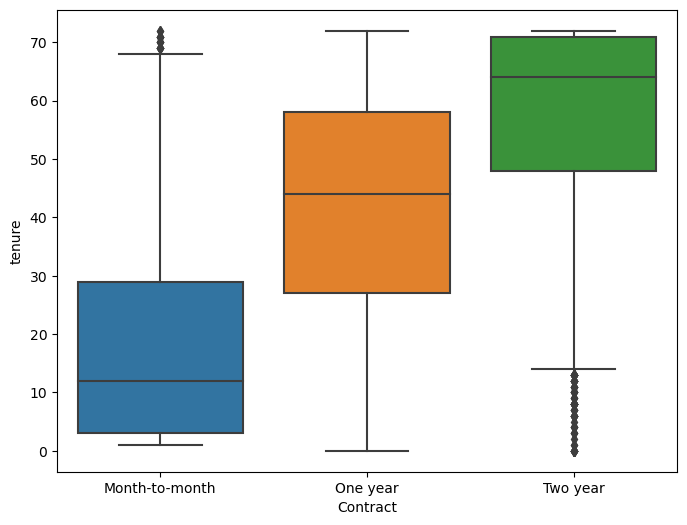

In [20]:
plt.figure(figsize = (8,6))

sns.boxplot(x = data['Contract'],y = data['tenure'] )

## 3.Linear Regression:

In [21]:
# ● Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error

In [22]:
#import the required libeary

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
#Spliting the X and Y from the dataset

x = data.loc[:, ['tenure']].values    #independent
y = data.loc[: , ['MonthlyCharges']].values   #dependent

In [24]:
#Split the data to train and test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state= 3)

In [25]:
#Train the model using traning data

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
#Testing the model using testing data

y_pred = lr.predict(x_test)

In [27]:
#Compare the actual vs predict data

error = mean_squared_error(y_test,y_pred)
error

868.3161133844123

In [28]:
#root mean square error

rsme = np.sqrt(error)
rsme

29.46720403065775

## 4. Logistic Regression:

In [29]:
# ● Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score

# ● d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score

In [30]:
#import the required libeary

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#### Build a simple logistic regression model

In [31]:
# a.Spliting the X and Y from the dataset

x_lg = data.loc[:, ['MonthlyCharges']].values    #independent
y_lg = data.loc[: , ['Churn']].values   #dependent

In [32]:
#Split the data to train and test split

x_train,x_test,y_train,y_test = train_test_split(x_lg,y_lg,test_size=0.35, random_state= 3)

In [33]:
#Train the model using traning data

leg_sim = LogisticRegression()
leg_sim.fit(x_train,y_train)

C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
#Testing the model using testing data

y_pred = leg_sim.predict(x_test)

In [35]:
#confusion matrix of the model

cm = confusion_matrix(y_test,y_pred)
cm

array([[1813,    0],
       [ 653,    0]], dtype=int64)

In [36]:
#accuracy_score

ac_log_sin = accuracy_score(y_test,y_pred)
print(ac_log_sin)

0.735198702351987


In [37]:
# classification_report

cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1813
         Yes       0.00      0.00      0.00       653

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Build a multiple logistic regression model 

In [38]:
#d.Spliting the X and Y from the dataset

x_lgr = data.loc[:, ['tenure','MonthlyCharges']].values    #independent
y_lgr = data.loc[: , ['Churn']].values   #dependent

In [39]:
#Split the data to train and test split

x_train,x_test,y_train,y_test = train_test_split(x_lgr,y_lgr,test_size=0.20, random_state= 1)

In [40]:
#Train the model using traning data

leg_mul = LogisticRegression()
leg_mul.fit(x_train,y_train)

C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
#Testing the model using testing data

y_pred = leg_mul.predict(x_test)

In [42]:
#confusion matrix of the model

cm = confusion_matrix(y_test,y_pred)
cm

array([[965,  96],
       [190, 158]], dtype=int64)

In [43]:
#accuracy_score

ac_log_mul = accuracy_score(y_test,y_pred)
print(ac_log_mul)

0.7970191625266146


In [44]:
# classification_report

cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1061
         Yes       0.62      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



## 5. Decision Tree: 

In [45]:
# ● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [46]:
#import the required libeary

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
#Spliting the X and Y from the dataset

x_dr = data.loc[:, ['tenure']].values   #independent
y_dr = data.loc[: , ['Churn']].values   #dependent

In [48]:
#Split the data to train and test split

x_train,x_test,y_train,y_test = train_test_split(x_dr,y_dr,test_size=0.20, random_state= 3)

In [49]:
#Train the model using traning data

dr = DecisionTreeClassifier()
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
#Testing the model using testing data

y_pred = dr.predict(x_test)

In [51]:
#confusion matrix of the model

cm = confusion_matrix(y_test,y_pred)
cm

array([[984,  62],
       [266,  97]], dtype=int64)

In [52]:
#accuracy_score

ac_dr = accuracy_score(y_test,y_pred)
print(ac_dr)

0.7672107877927609


In [53]:
# classification_report

cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

          No       0.79      0.94      0.86      1046
         Yes       0.61      0.27      0.37       363

    accuracy                           0.77      1409
   macro avg       0.70      0.60      0.61      1409
weighted avg       0.74      0.77      0.73      1409



## 6. Random Forest:

In [54]:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [55]:
#import the required libeary

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
#Spliting the X and Y from the dataset

x_rf = data.loc[:, ['tenure','MonthlyCharges']].values    #independent
y_rf = data.loc[: , ['Churn']].values   #dependent

In [57]:
#Split the data to train and test split

x_train,x_test,y_train,y_test = train_test_split(x_rf,y_rf,test_size=0.30, random_state= 2)

In [58]:
#Train the model using traning data

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

C:\Users\Vijay\AppData\Local\Temp\ipykernel_5060\680096278.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [59]:
#Testing the model using testing data

y_pred = rf.predict(x_test)

In [60]:
#confusion matrix of the model

cm = confusion_matrix(y_test,y_pred)
cm

array([[1359,  210],
       [ 302,  242]], dtype=int64)

In [61]:
#accuracy_score

ac_rf = accuracy_score(y_test,y_pred)
print(ac_rf)

0.7576904874585897


In [62]:
# classification_report

cl = classification_report(y_test,y_pred)
print(cl)

              precision    recall  f1-score   support

          No       0.82      0.87      0.84      1569
         Yes       0.54      0.44      0.49       544

    accuracy                           0.76      2113
   macro avg       0.68      0.66      0.66      2113
weighted avg       0.75      0.76      0.75      2113



## Conclusion

In [63]:
# To compare the accuracty score of the Logistic regression,Decision tree and random forest

print(f"""The accuracy of Simple Logistic Regresion : {ac_log_sin} ,
\nThe accuracy of multiple Logistic Regresion : {ac_log_mul}, 
\nThe accuracy of dicision tree :{ac_dr},
\nThe accuracy of Random Forest :{ac_rf}""")

The accuracy of Simple Logistic Regresion : 0.735198702351987 ,

The accuracy of multiple Logistic Regresion : 0.7970191625266146, 

The accuracy of dicision tree :0.7672107877927609,

The accuracy of Random Forest :0.7576904874585897


In [65]:
print("Comparatively the Multiple Logistic Regresion is performing well compare to other models." )
#print("That means the Tenure and Monthly Charges are not satisfied to the customer that's why customer churn from the subscription")

Comparatively the Multiple Logistic Regresion is performing well compare to other models.
